# Iterative deepening search (IDS) 

IDS enumerates paths (from the source node) until it finds a solution (target node) prioritizing the deepest (longest) paths with an increasing limit of maximum depth. 

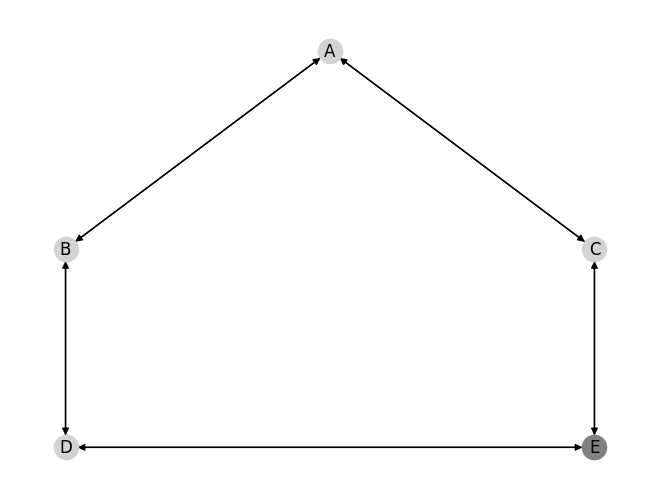

In [1]:
import networkx as nx
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','D'],'C':['A','E'], 'D':['B','E'],'E':['C','D']}
source='A'
Target=['E']
nxG=nx.DiGraph(G)
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
#pos_nodes = nx.nx_agraph.pygraphviz_layout(nxG,prog='dot',root=source)
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray")
nx.draw_networkx_nodes(G,pos=pos_nodes, nodelist=Target, node_color='gray')

## IDS algorithm 
IDFS(G,s)
> for m = 0, 1, 2, ...
>>  if (r = DFS(G,s,m)) $\neq$ NULL
>>>    return r

## IDS implementation returning the target node that was reached

In [3]:
def dfs(G, s, m, Target):
  if s in Target: return s
  if m == 0: return None
  for n in G[s]:
    r = dfs(G,n,m-1,Target)
    if r != None: return r
  return None

def ids(G,source, M, Target):
  for m in range(M+1):
    r = dfs(G,source,m,Target)
    if r != None:
      return r

print(ids(G,source,3,Target))

E


### IDS implementation graphically showing the sequence of nodes visited

E


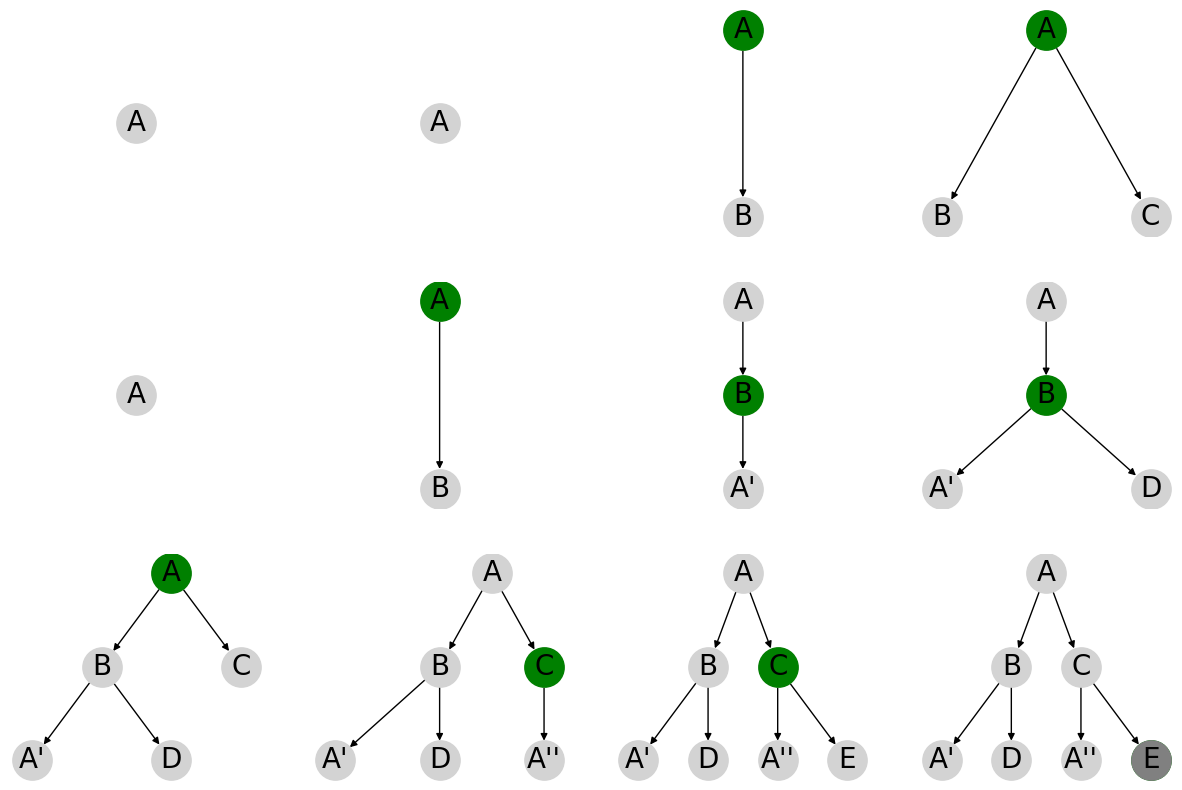

In [4]:
import matplotlib.pyplot as plt

DG={}
nrows=3; ncols=4
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = iter(fig.axes)

def draw_graph(DG, source, active=[], target=[]):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG,prog='dot',root=source)
  nx.draw(nxDG,pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_nodes(DG,pos=pos_nodes, ax=ax, nodelist=active, node_color='green', node_size=800)
  nx.draw_networkx_nodes(DG,pos=pos_nodes, ax=ax, nodelist=target, node_color='gray', node_size=800)

def dfs(G, s, m, Target):
  if s[0] in Target: 
      draw_graph(DG, source, [s], [s])
      return s
  if m == 0: return None
  Adj = DG[s]
  for n in G[s[0]]:
    while n in DG: n+="'"
    Adj.append(n); DG[s]=Adj; DG.update({n:[]})
    draw_graph(DG, source, [s])
    r = dfs(G,n,m-1,Target)
    if r != None: return r
  return None

def ids(G,source, M, Target):
  for m in range(M+1):
    DG.update({source:[]})
    draw_graph(DG, source)
    r = dfs(G,source,m,Target)
    DG.clear()
    if r != None:
      return r

print(ids(G,source,3,Target))


IDS is complete, and optimal if actions (edge cost) have identical positive costs  

**Complexity**  

G with branching factor $b$ and maximum depth $m$.  

The asymptotic cost is the same as in DFS, but the temporal cost is higher in practice. 